# Statistic

In [1]:
import os
import random
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pylab as plt

import seaborn as sns

from sklearn.datasets import load_iris


from math import sqrt
from scipy.stats import norm,binom,poisson,shapiro,bernoulli


In [2]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)
N_SAMPLE = 5000


CMAP = plt.cm.rainbow
plt.set_cmap(CMAP)
plt.style.use('seaborn-v0_8-darkgrid')

TEST_SIZE = 0.20

<Figure size 640x480 with 0 Axes>

In [3]:
def fn_gen_data(n_sample = 50,
                dist = 'uniform',
                random_var = 0):
    if dist == 'uniform':
        d=np.random.random(size=n_sample)
    
    if dist == 'normal':
        d=np.random.normal(loc=1-random_var,
                           scale=1+random_var,
                           size=n_sample)
        
    if dist == 'binomial':
        d=np.random.binomial(n=10,p=0.5+random_var/10,
                             size = n_sample)
        
    if dist == 'exponential':
        d = np.random.exponential(scale=0.5+random_var,
                                  size=n_sample)
        
    if dist == 'poisson':
        d = np.random.poisson(lam=1.0+random_var,size=n_sample)
        
    if dist == 'laplace':
        d = np.random.laplace(loc=0.0,scale=1.0,size=n_sample)
        
    d = d+np.abs(d.min())
    d = d/(d.max()-d.min())
    
    return d
        

In [4]:
def fn_plot_data(data,
                 binwidth = 0.1,
                 title = 'Uniform'):
    
    sns.histplot(data, kde=True,
                 binwidth=binwidth,
                 binrange=(0,1),
                 kde_kws={'bw_adjust':1.5},
                 element='step')
    #add labels and title
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'{title.title()} Distribution')
    plt.grid(True)
    
    plt.show() # show the plot
    

## Uniform Distribution

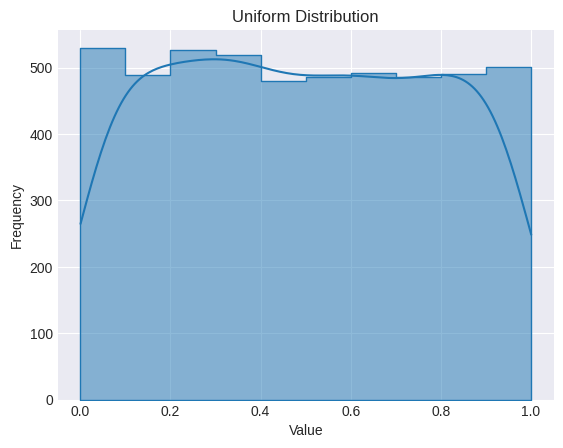

In [5]:
#return random floats in the half-open interval[0.0,1.0)

dist_type = 'uniform'
data_uniform =fn_gen_data(n_sample=N_SAMPLE,
                          dist=dist_type,
                          random_var=0)
fn_plot_data(data_uniform, title= dist_type)

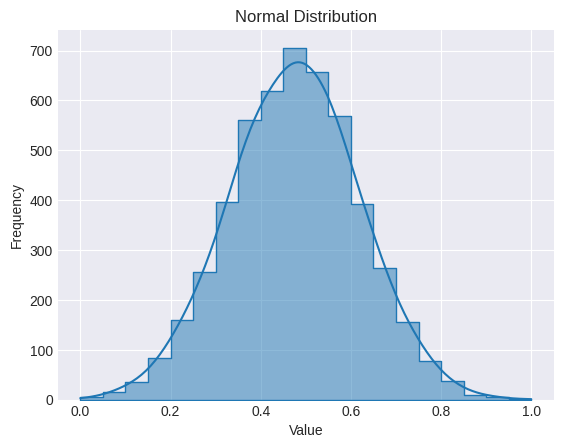

In [6]:
dist_type = 'normal'
data =fn_gen_data(n_sample=N_SAMPLE,
                          dist=dist_type,
                          random_var=0)
fn_plot_data(data,0.05, title= dist_type)

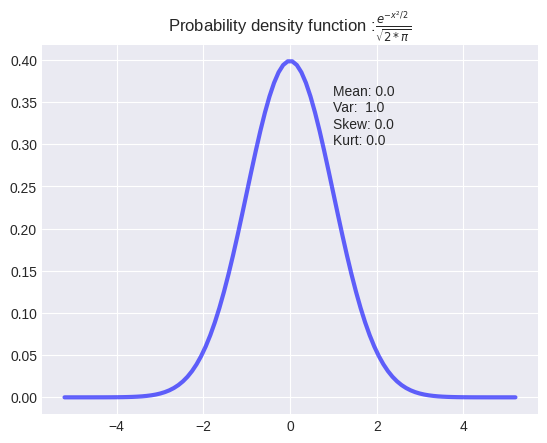

In [7]:
mean,var,skew,kurt = norm.stats(moments = 'mvsk')

eps = 1e-7

x = np.linspace(norm.ppf(eps),
                norm.ppf(1-eps),
                100)

plt.plot(x,norm.pdf(x),
         'b-',lw=3,alpha=0.6,label = 'norm pdf')
plt.title("Probability density function :$\\frac{e^{-x^2/2}} {\sqrt{2 * \pi}}$",fontsize = 12) #to print equation on plot title use $
plt.text(1,.3,f'Mean: {mean}\nVar:  {var}\nSkew: {skew}\nKurt: {kurt}')
plt.grid(True)
plt.show()



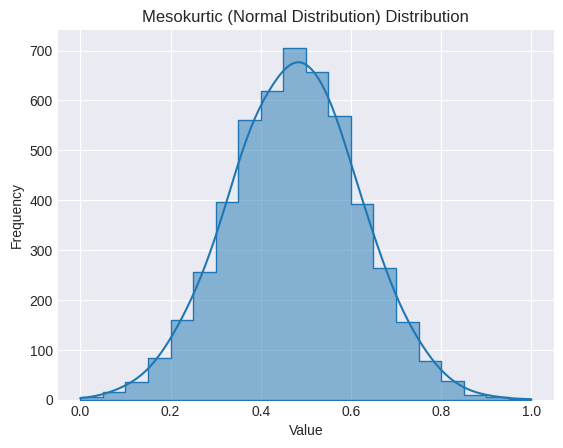

In [8]:
#Mesokurtic Distribution(Normal Distribution)
fn_plot_data(data,0.05,title="Mesokurtic (Normal Distribution)")


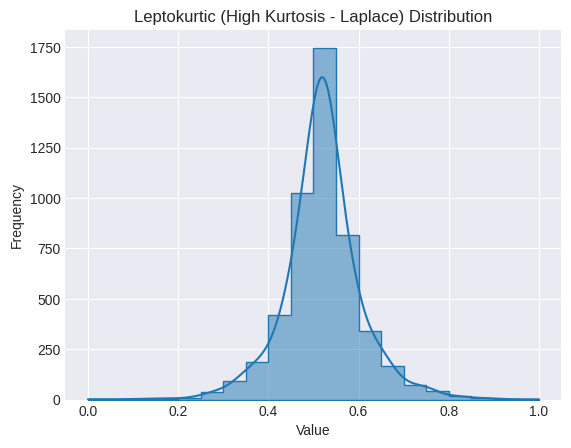

In [9]:
# 2. Leptokurtic Distribution (High Kurtosis - Laplace)
#using a laplace distribution which has fatter 
dist_type = 'laplace'

data_leptokurtic = fn_gen_data(n_sample=N_SAMPLE,
                               dist=dist_type,
                               random_var=0)

fn_plot_data(data_leptokurtic,0.05,
             title="Leptokurtic (High Kurtosis - Laplace)")

In [10]:
stat,p_value = shapiro(data)

print(f'Shapiro-Wilk Test Statistic: {stat}, P_value: {p_value}')
#interpreting the result
alpha = 0.05
if p_value >alpha:
    print("The sample looks normally distributed (fail to reject H0)")
else:
    print("The sample does not look normally distributed (reject H0)")
    
    
    

Shapiro-Wilk Test Statistic: 0.9997612299493445, P_value: 0.8734067500794205
The sample looks normally distributed (fail to reject H0)


# Fair coin toss 

In [11]:
bernoulli.rvs(p=0.5,size=10)

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [12]:
pr=0.5 #fair coin toss probability
mean, var, skew, kurt = bernoulli.stats(p=pr, moments='mvsk')

print("Mean:",mean)
print("Variance:",var)
print("Skew:",skew)
print("Kurtosis:",kurt)

Mean: 0.5
Variance: 0.25
Skew: 0.0
Kurtosis: -2.0


In [13]:
pr=0.6 #fair coin toss probability
mean, var, skew, kurt = bernoulli.stats(p=pr, moments='mvsk')

print("Mean:",mean)
print("Variance:",var)
print("Skew:",skew)
print("Kurtosis:",kurt)

Mean: 0.6
Variance: 0.24
Skew: -0.4082482904638634
Kurtosis: -1.8333333333333308


In [14]:
pr=0.7 #fair coin toss probability
mean, var, skew, kurt = bernoulli.stats(p=pr, moments='mvsk')

print("Mean:",mean)
print("Variance:",var)
print("Skew:",skew)
print("Kurtosis:",kurt)

Mean: 0.7
Variance: 0.21000000000000002
Skew: -0.8728715609439702
Kurtosis: -1.2380952380952361


In [15]:
pr=0.8 #fair coin toss probability
mean, var, skew, kurt = bernoulli.stats(p=pr, moments='mvsk')

print("Mean:",mean)
print("Variance:",var)
print("Skew:",skew)
print("Kurtosis:",kurt)

Mean: 0.8
Variance: 0.15999999999999992
Skew: -1.4999999999999991
Kurtosis: 0.24999999999999245


In [16]:
pr=0.9 #fair coin toss probability
mean, var, skew, kurt = bernoulli.stats(p=pr, moments='mvsk')

print("Mean:",mean)
print("Variance:",var)
print("Skew:",skew)
print("Kurtosis:",kurt)

Mean: 0.9
Variance: 0.08999999999999997
Skew: -2.6666666666666705
Kurtosis: 5.111111111111155


......

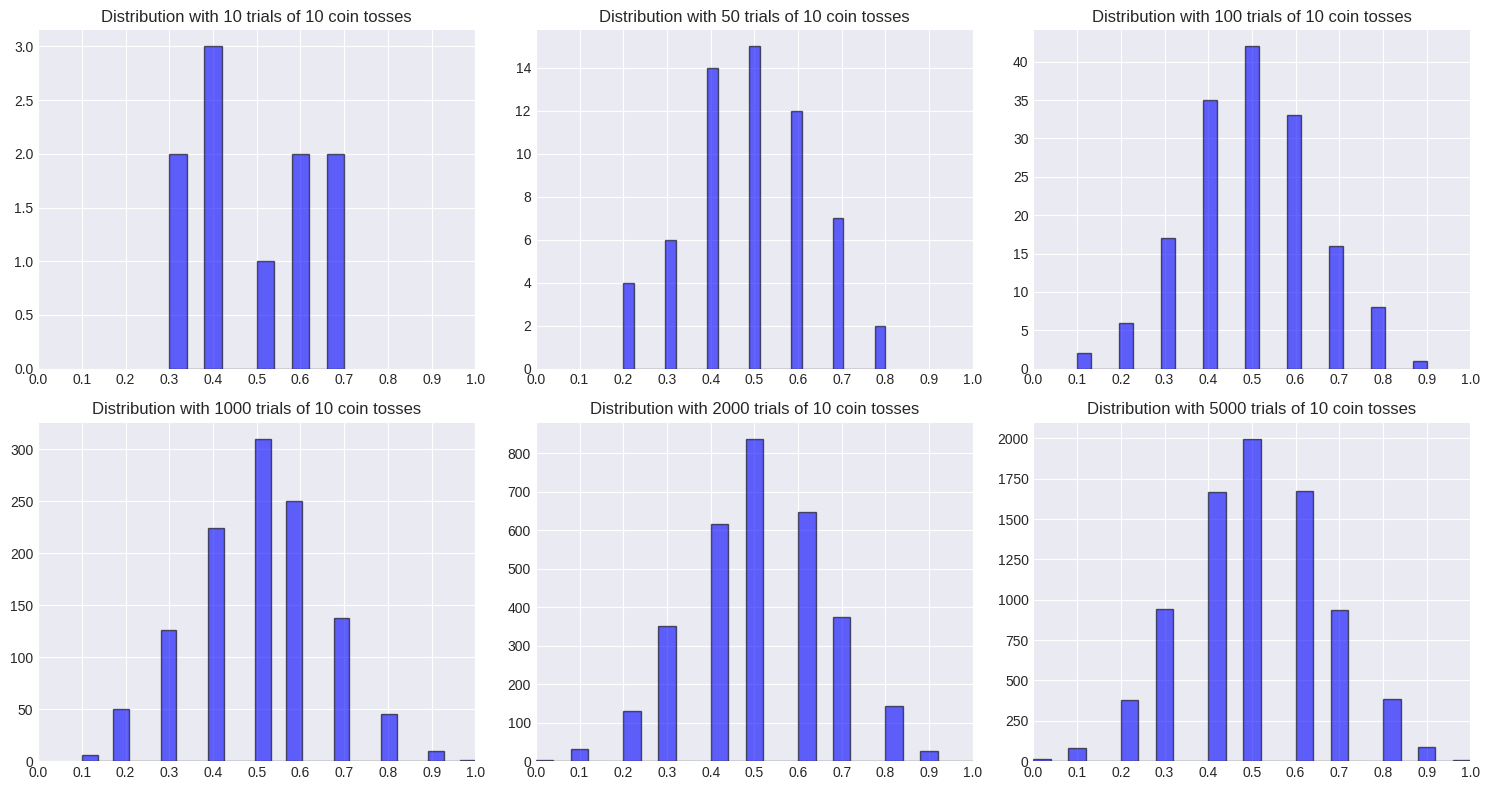

In [17]:
num_trials = [10, 50, 100, 1000, 2000,5000] # number of trials
pr=0.5 # Fair coin toss probability
av = [] # empty list to store the average of the random variates

fig, axes = plt.subplots(2,3, figsize = (15,8))
axes = axes.ravel()

for count, nTrials in enumerate(num_trials):
    print ('.', end='') #TQDM library tracker it drws progress bar how much time 'for' run . will print ......
    ax = axes[count]
    bins = 25
    if nTrials == 10:
        bins = 10
    
    for  n in range(1,nTrials+1):
        av.append(np.mean(bernoulli.rvs(p=pr,size=10)))
    
    ax.set_title("Distribution with {} trials of 10 coin tosses".format(nTrials))
    ax.hist(av,bins=bins,edgecolor='k',color='b', alpha=0.6)
    ax.set_xlim(0.0,1.0)
    ax.set_xticks([0.1*i for i in range(11)])
    ax.grid(True)
plt.tight_layout()
plt.show()
        
        
        
        
        

# Binomial Distribution 

In [18]:
n = 3
p = 0.5
k = 1
probability = binom.pmf(k, n, p)

print(f"The probability of finding exactly {k} defective bulbs out of {n} is: {probability:.4f}")


The probability of finding exactly 1 defective bulbs out of 3 is: 0.3750


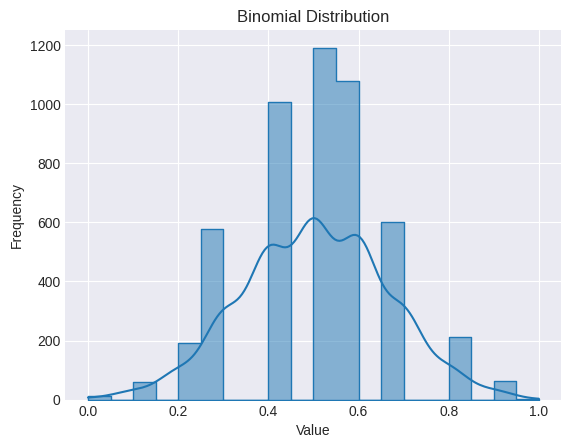

In [19]:
dist_type = 'binomial'

data = fn_gen_data(n_sample=N_SAMPLE,
                   dist=dist_type,
                   random_var=0)
fn_plot_data(data, 0.05, title = dist_type)

## Exponential

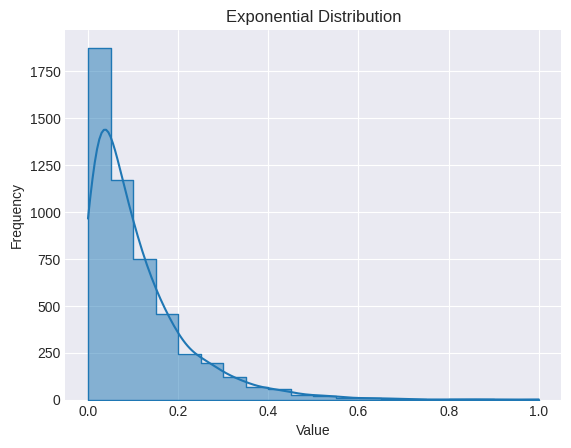

In [20]:
dist_type = 'exponential'

data = fn_gen_data(n_sample=N_SAMPLE,
                   dist=dist_type,
                   random_var=0)
fn_plot_data(data, 0.05, title = dist_type)

## Poisson Distribution

In [21]:
#parameters
lamdba_value = 3
k = 5
#calculate the probablity
probability = poisson.pmf(k,lamdba_value)
print(probability)


0.10081881344492458


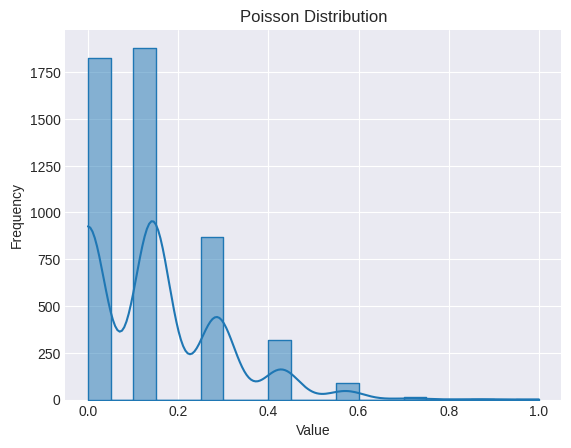

In [22]:
dist_type = 'poisson'

data = fn_gen_data(n_sample=N_SAMPLE,
                   dist=dist_type,
                   random_var=0)
fn_plot_data(data, 0.05, title = dist_type)

# Join Probablity

In [34]:
data_1= {
    'Study Hours':['Low','Low','High','High'],
    'Pass Exam':[0,1,0,1],
    'Frequency':[3,7,2,8]
}
df = pd.DataFrame(data_1)
df

,Study Hours,Pass Exam,Frequency
0,Low,0,3
1,Low,1,7
2,High,0,2
3,High,1,8


In [35]:
joint_prob =df[(df['Study Hours'] == 'High') & (df['Pass Exam']==1)]['Frequency'].sum() / df['Frequency'].sum()
print(f'joint probability of High study Hours and Passing : {joint_prob:.2f}')
conditional_prob = joint_prob / (df[df['Study Hours']== 'High']['Frequency'].sum() / df['Frequency'].sum())
print(f'Conditional Probablity of passing given high study hours:{conditional_prob:.2f}')

joint probability of High study Hours and Passing : 0.40
Conditional Probablity of passing given high study hours:0.80


In [36]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
fig = plt.figure(figsize=(15,8))

fig.suptitle('Iris Dataset')

for col in np.arange(X.shape[1]):
    ax = fig.add_subplot()